# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Desti Ratna Komala** | destiratnakomala@gmail.com | **Pyspark-large-on-local** |

# II. Notebook Target Definition

The objective of this project is to understand how pyspark works when working with 100 million rows of dataset

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, DateType, StringType, FloatType
from pyspark.sql.functions import rand
import os

## III.B. Import Data

In [18]:
#input and output data paths
data_csv= r'D:\PANDU\MARCH-JUNE-2024\portfolio\port\pyspark-large\data\processed\cleaned_*.csv'
movie_titles_path= r'D:\PANDU\MARCH-JUNE-2024\portfolio\port\pyspark-large\data\raw\Netflix\movie_titles.csv'
output_data_parquet= r'D:\PANDU\MARCH-JUNE-2024\portfolio\port\pyspark-large\data\processed'

In [26]:
skip= False

if os.path.exists(output_data_parquet):
    skip= True
    print("SparkContext already exists.")
if not skip:
    try:
        sc= SparkContext(appName='csv to parquet')
        spark= SparkContext.builder.master('local').getOrCreate()
        print("No existing SparkContext found. Creating a new one.")
    except:
        pass

SparkContext already exists.


Each one of the two datasets have different columns and data types. Following that information, the data will be specified as such.

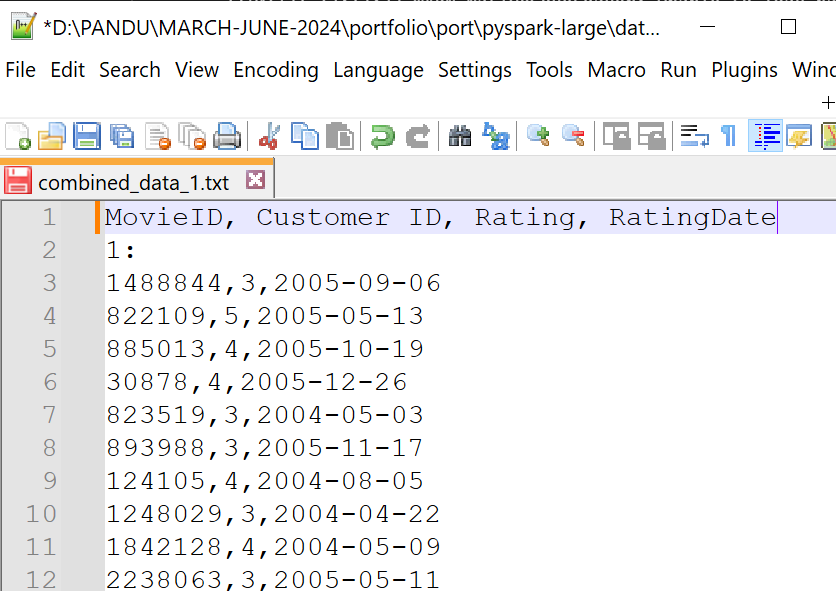

In [27]:
schema_data= StructType([
    StructField('MovieID', IntegerType(), True), 
    StructField('Customer ID', IntegerType(), True), 
    StructField('Rating', FloatType(), True), 
    StructField('RatingDate', DateType(), True)
    ])

schema_movies = StructType([
    StructField('MovieID', IntegerType(), True), 
    StructField('YearOfRealease', IntegerType(), True)
])

Using the schemas, we load the datasets into two different dataframes

#load the datasets with the specified schemas
if not skip:
    df= spark.read.csv()

# IV. Data Preparation

## IV.A. Data Shape Inspection

In [ ]:
df.shape

## IV.B. Data Information Inspection

In [ ]:
df.info()

## IV.C. Data Aggregation

In [ ]:
# Aggregating dataframes with the same column names
df_aggregated = pd.concat([df, df1])

# Aggregating dataframes with different column names
df_aggregated = pd.concat([df, df1], axis=1)

In [ ]:
df_aggregated.shape

In [ ]:
df_aggregated.head()

## IV.D. Data Definition

| Variables | Columns Definition |
| :-: | :-: |
| _column_0_ | _Column Definition_ |
| _column_1_ | _Column Definition_ |
| _column_2_ | _Column Definition_ |

## IV.E. Data Validation

| Variables | Data Types |
| :-: | :-: |
| _column_0_ | _Data Type_ |
| _column_1_ | _Data Type_ |
| _column_2_ | _Data Type_ |

In [ ]:
# Convert to boolean
df_aggregated["column_name"] = df_aggregated["column_name"].astype(bool)

# Convert to datetime
df_aggregated["column_name"] = pd.to_datetime(df_aggregated["column_name"])

# Convert to float
df_aggregated["column_name"] = df_aggregated["column_name"].astype(float)

# Convert to integer
df_aggregated["column_name"] = df_aggregated["column_name"].astype(int)

# Convert to string
df_aggregated["column_name"] = df_aggregated["column_name"].astype(str)

In [ ]:
df_aggregated.head()

In [ ]:
df_aggregated.info()

## IV.F. Data Segregation

In [ ]:
X = df_aggregated.drop("label_target", axis=1)
y = df_aggregated["label_target"]
X.shape, y.shape

In [ ]:
X.head()

In [ ]:
y.head()

## IV.G. Export Data

In [ ]:
X.to_pickle('../../data/processed/X.pkl')
y.to_pickle('../../data/processed/y.pkl')